# Wrapper para Seleção de Variáveis

### Importando banco de dados do CSV

In [1]:
import pandas as pd

df = pd.read_csv('data/AG.csv')
df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,Y
0,1.0,0.668836,0.223671,0.049866,0.008338,0.001115,0.000124,1.187973e-05,9.931989e-07,7.380968e-08,...,5.515064,-4.158605,0.618974,-4.116807,-0.435625,-4.429051,-1.630177,-3.976518,-1.281325,5.430095
1,1.0,-0.327953,0.053777,-0.005879,0.000482,-0.000032,0.000002,-8.095714e-08,3.318772e-09,-1.209336e-10,...,2.776594,-0.024665,-1.347030,-0.699568,-1.551804,-0.181644,-1.918719,2.501295,0.074414,4.262274
2,1.0,0.850103,0.361338,0.102391,0.021761,0.003700,0.000524,6.366070e-05,6.764772e-06,6.389728e-07,...,-0.036363,0.410337,0.815217,0.101219,-0.101883,0.815899,-2.736296,6.157502,1.206547,5.325627
3,1.0,-0.793639,0.314931,-0.083314,0.016530,-0.002624,0.000347,-3.934874e-05,3.903587e-06,-3.442266e-07,...,1.047014,3.343626,-2.747950,3.825652,2.073415,-2.235211,5.157959,-4.891234,-1.029653,2.351604
4,1.0,0.346215,0.059932,0.006916,0.000599,0.000041,0.000002,1.183007e-07,5.119679e-09,1.969453e-10,...,1.226746,-0.772538,-5.436351,3.862642,-1.246642,0.378348,4.264909,3.224015,-3.794623,5.276979


### Seleção de Variáveis

In [2]:
from genetic_algorithm.genetic_algorithm import genetic_algorithm

# Algorithm usage:
# genetic_algorithm(population_size:int, max_generations: int, mutation_rate:float, database: DataFrame)
best_genes = genetic_algorithm(
    population_size=8,
    max_generations=30,
    mutation_rate=.05,
    database=df
)

Generation #1
Chromossome 1 '1000000100100000100010000111000000100100'
Chromossome 2 '0000000000000000010000000100000000000001'
Chromossome 3 '0000000010000000000001000100100001000010'
Chromossome 4 '0100001010010011001001000000100010000010'
Chromossome 5 '1010010000000100010010100100100100100000'
Chromossome 6 '1011000000000101000001110001000000100011'
Chromossome 7 '0000010000000010000010100001000000100000'
Chromossome 8 '0010000000000000000000100001100000010000'
Generation #2
Chromossome 1 '0000000000000010000011100100000001100000'
Chromossome 2 '0000010010000001000000000101100000000010'
Chromossome 3 '0000000010000000000001000100100001000010'
Chromossome 4 '0010000010000000011000000100100010000011'
Chromossome 5 '0000000000100001000001000100000001000000'
Chromossome 6 '0000000101000010000010100101000000100100'
Chromossome 7 '1000011000100000100010000011000000100000'
Chromossome 8 '0000000010000000000001000100100001000010'
Generation #3
Chromossome 1 '0000000101100000000000000101000

### Preparação dos dados para Plotagem

In [3]:
from helpers.data_manipulation import prepare_database, filter_database
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = prepare_database(df)
X_train = filter_database(X_train, best_genes)
X_test = filter_database(X_test, best_genes)


classifier = KNeighborsRegressor(3).fit(X_train, y_train.values.ravel())
y_predict = classifier.predict(X_test)

### Gráfico de Dispersão

<AxesSubplot:title={'center':'Predicted x Real'}, xlabel='y_predict', ylabel='Y'>

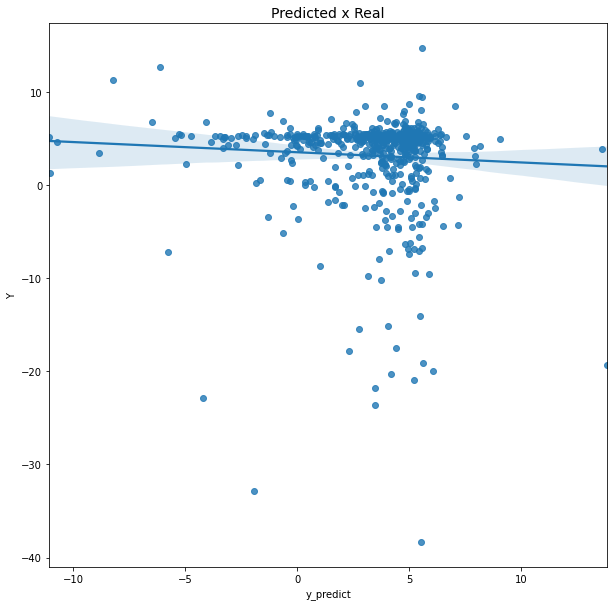

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 10))
plt.xlabel("y_predict")
plt.ylabel("y_test")
plt.title("Predicted x Real", size=14)
sns.regplot(x=y_predict,y=y_test)